# Lab04 Extra Practice - Visualization

This notebook focuses on Kernel Density Estimation (KDE).

(Why KDE?)

Data visualization and data smoothing are fundamental problems that data scientists battle with every day. Collected data is often discretized, but the real world is continuous. 

Tersely put, smoothing is the process of turning discrete data into continuous data. Data visualization is the art of converting numbers and symbols in a tabular format into a more useful and meaningful plot.

Kernel Density Estimator is a function that transforms, smooths, and scales the data to be continuous. KDE Plots are useful data visualizations that can display the rough shape (aka distribution) of your population.

## Loading Data


In [1]:
import pandas as pd

data = pd.read_csv("alameda pm2.5 data - Sheet1.csv")

data.head(5)

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/01/2019,AQS,60010007,3,5.7,ug/m3 LC,24,Livermore,1,100,88101,PM2.5 - Local Conditions,41860,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
1,01/02/2019,AQS,60010007,3,11.9,ug/m3 LC,50,Livermore,1,100,88101,PM2.5 - Local Conditions,41860,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
2,01/03/2019,AQS,60010007,3,20.1,ug/m3 LC,68,Livermore,1,100,88101,PM2.5 - Local Conditions,41860,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
3,01/04/2019,AQS,60010007,3,28.8,ug/m3 LC,86,Livermore,1,100,88101,PM2.5 - Local Conditions,41860,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
4,01/05/2019,AQS,60010007,3,11.2,ug/m3 LC,47,Livermore,1,100,88101,PM2.5 - Local Conditions,41860,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217


## Histograms vs KDE Plots

KDE plots are basically smoothed out histograms. Histograms are discrete, while KDE plots are continuous (making it more convenient for further analysis).

### Create 3 histograms with # bins of 5, 25, and 125

Hint: use plt.hist()

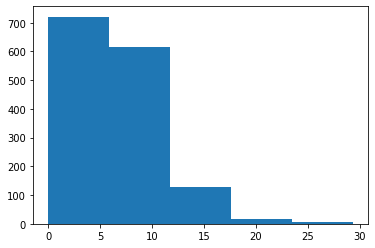

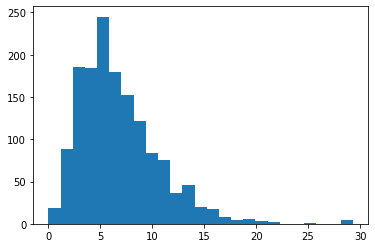

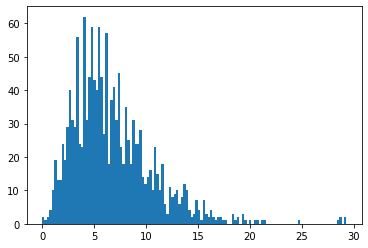

In [4]:
import numpy as np
import matplotlib.pyplot as plt
sizes = np.array([5 * x for x in [1, 5, 25]])
for size in sizes:
    plt.hist(data['Daily Mean PM2.5 Concentration'], bins = size)
    plt.show()

#### Let's now take a look at the prettier seaborn histogram of Daily Mean PM2.5 Concentration.

Hint: use sns.distplot

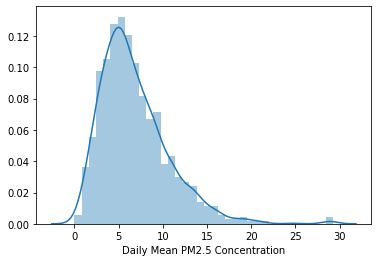

In [5]:
import seaborn as sns

sns.distplot(data['Daily Mean PM2.5 Concentration'])

When plotting histograms with sns.distplot, it automatically creates a Kernel Density Estimation plot, too (the smooth, blue line). The default bandwidth of this automatic KDE plot is 1.

### Create KDE plots with bandwidths 1, 1/5, and 1/25

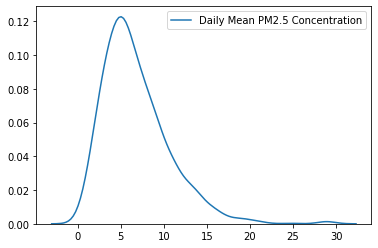

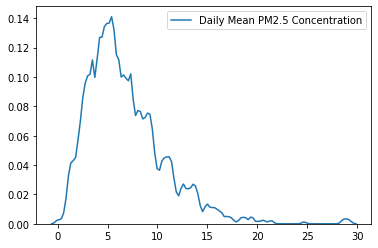

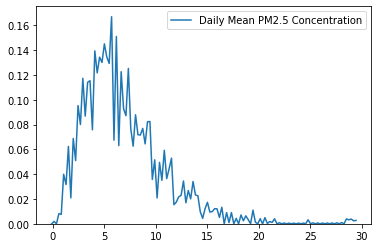

In [6]:
bandwidths = np.array([1/x for x in [1, 5, 25]])

for bandwidth in bandwidths:
    sns.kdeplot(data['Daily Mean PM2.5 Concentration'], bw = bandwidth)
    plt.show()

**How does changing bins affect the histogram? How does changing bandwidth affect the KDE?**

Your answer here

## Kernel Density Estimation: Example

Recall that the general formula for an estimation at a given point is:

$\sum_{obs\in x}{K(\dfrac{x - obs}{b})}$ where $x$ is a vector of our observed data points, $b$ is bandwidth, and $K$ is the type of Kernel function we're working with.

Let's break this equation down. 

* $x - obs$ is saying "shift the center of our data to be at $obs$"
* Bandwidth b, then, is just a scalar. $\dfrac{x - obs}{b}$ is saying "scale this newly centered data by $b$"
* K is just a function that takes in $\dfrac{x - obs}{b}$ (which is a vector) as an input. If K is a Gaussian kernel, it will take your data input and fit it/transform it into a Gaussian curve -- centered at $x-obs$, with bandwidth $b$ as its variance.
    * K is a probability density function, which means that the area under the curve adds up to 1.
Tersely put, we scale our data so that it's centered at obs, scaled by bandwidth, 

In the following example, we will use the default Gaussian (aka normal curve) kernel.

**For the purposes of this class, it's not at all necessary to understand every aspect of KDE. The following example will give a high level overview of how KDE operates, which is certainly more than good enough.**

**(Note: For simplicity, we won't be taking bandwidth into account in this example (bandwidth will be assumed to be 1). From a high level perspective, you can think of bandwidth as the width of your kernel.)**

Let's start out by making up some easy data and plotting the shape of its distribution using a histogram.

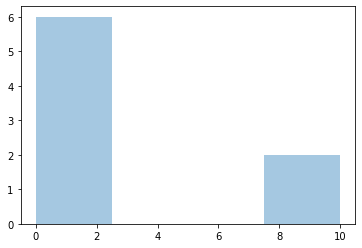

In [8]:
toy_data = [0, 0, 0, 0, 0, 0, 10, 10]
sns.distplot(toy_data, kde = 0)

#### Step 1: Place a kernel at each data point

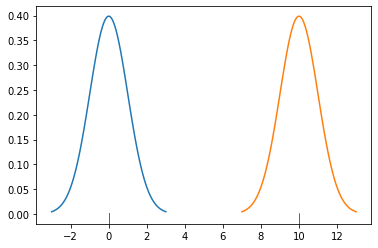

In [9]:
import statistics
import math
import scipy.stats as stats

a = sns.rugplot(toy_data)

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
a.plot(x, stats.norm.pdf(x, mu, sigma))

mu = 10
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
a.plot(x, stats.norm.pdf(x, mu, sigma))

a

**IMPORTANT NOTE: There are actually 6 kernels centered at 0 (one for each 0 in toy_data), and 2 kernels centered at 10.**

#### Step 2: Sum up the kernels

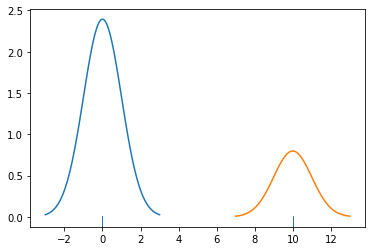

In [10]:
a = sns.rugplot(toy_data)

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
a.plot(x, 6 * stats.norm.pdf(x, mu, sigma))

mu = 10
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
a.plot(x, 2 * stats.norm.pdf(x, mu, sigma))

a

#### Step 3: Scale the data such that the total area under the curve is 0.

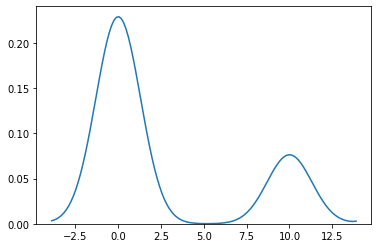

In [11]:
sns.kdeplot(toy_data, kernel = 'gau')

**That's cool and all, but where does bandwidth come into play?**

You can think of bandwidth as the width of your kernel. With a Gaussian kernel, this is analogous to changing the variance parameter. Let's check it out!

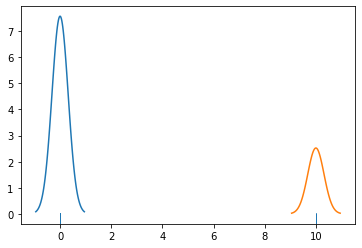

In [12]:
a = sns.rugplot(toy_data)

mu = 0
variance = .1 # change variance to .1 -- normal curve gets skinnier and taller
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
a.plot(x, 6 * stats.norm.pdf(x, mu, sigma)) # 6 kernels 

mu = 10
variance = .1 # change variance to .1 -- normal curve gets skinnier and taller
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
a.plot(x, 2 * stats.norm.pdf(x, mu, sigma))

a

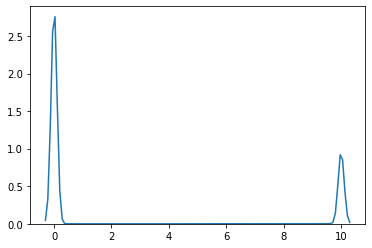

In [13]:
# Compare to sns.kdeplot
sns.kdeplot(toy_data, bw = .1)

In this example, there is a clear separation between the two bins. Because of this separation, it's now easier to think of kernel density as "the ratio of how many kernels I can fit under each point." Roughly speaking, there are 6 kernels (one for each 0 in toy_data) under the first bin (0 - 2), and 2 kernels (one for each 10 in toy_data) under the second bin (8 - 10). In a ratio, it would be 3:1. 

(Look at the above plot again -- does it look like the bigger hump is 3 times larger than the smaller hump?)

## Kernel Density Estimation -- Your turn!

The function below takes in a series of data, with default values of bandwidth 1, and a Gaussian kernel. Play with the data values in toy_data_custom and see what happens!

(For starters: what happens if the curves overlap? Take a look at toy_data_custom = [0, 0, 0, 0, 7, 7, 10, 10])

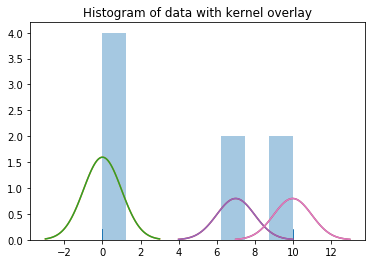

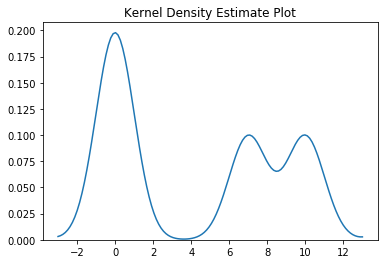

In [14]:
# You don't really have to know every line of code in this function.
# Just know what the entire function does and how to use it.
# That's the beauty of abstraction!

def toy_kde(data, bandwidth = 1, kernel = 'gau'):
    
    display(sns.distplot(data, bins = data.shape[0], kde = False))
    
    a = sns.rugplot(toy_data)

    for mu in data.unique():
        num_mu = sum(data == mu)
        
        variance = 1 * bandwidth
        sigma = math.sqrt(variance)
        x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
        a.plot(x, num_mu * stats.norm.pdf(x, mu, sigma))

        variance = 1 * bandwidth
        sigma = math.sqrt(variance)
        x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
        a.plot(x, num_mu * stats.norm.pdf(x, mu, sigma))
        a.set_title("Histogram of data with kernel overlay")
        display(a)
    
    f, ax = plt.subplots()
    ax.set_title(label = "Kernel Density Estimate Plot")
    display(sns.kdeplot(data, bw = bandwidth, kernel = kernel))
    

# CHANGE YOUR DATA HERE!    
toy_data_custom = [0, 0, 0, 0, 7, 7, 10, 10] 



toy_kde(pd.Series(toy_data_custom))

$Cool$ $beans!$

## When to Use Different Kernels: Example

(a) **Let's take a look at the 10-bin histogram of the average "Daily Mean PM2.5 Concentration" for each "Site ID".**

Hint: Use sns.distplot

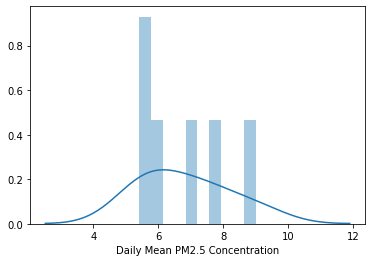

In [12]:
# Histogram

sns.distplot(data.groupby("Site ID").mean().loc[:, 'Daily Mean PM2.5 Concentration'], bins = 10)

(b) **Let's try using a triangular kernel with bandwidth 0.5.**

Hint: Use sns.kdeplot. Which argument allows you to select the kernel? Which argument is a triangular kernel?

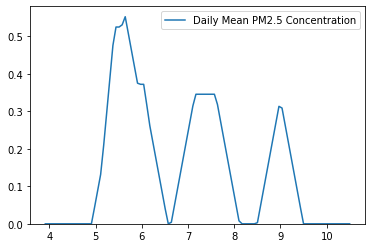

In [13]:
# KDE Plot using Triangle kernel

sns.kdeplot(data.groupby("Site ID").mean().loc[:, 'Daily Mean PM2.5 Concentration'], kernel = 'tri', bw = .5)

(c) **Make another kdeplot again, but this time with the (default) Gaussian kernel, also with bandwidth 0.5.**

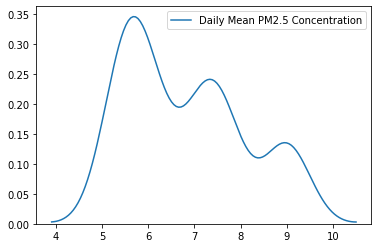

In [14]:
# KDE Plot using Gaussian kernel

sns.kdeplot(data.groupby("Site ID").mean().loc[:, 'Daily Mean PM2.5 Concentration'], kernel = 'gau', bw = .5)

**Assume our histogram from part (a) is the "true" distribution. Which kdeplot makes more sense?**

The triangular kernel makes more sense. The Gaussian kernel is smoother, but also gives the values between 6-7 a fairly high likelihood; however, our original histogram suggests that the values are a bit more discretized and centered around 5-6, 7-8, and 9. 

# Congratulations! You reached the end of the notebook :)